# Adversarial Attacks

In [7]:
import torch
from helpers import load_model, read_image, show_image, classifier
import adv_attacks as adv
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the model
We first load a pretrained model and a classifier class that wraps the output of the model.

In [8]:
model = load_model(name='ResNet50')
clf = classifier(model)

## Classify an image

We now read an image and classify it with the model.

0: toucan, probability: 19.69991773366928%
1: bald eagle, probability: 0.20609041675925255%
2: barn spider, probability: 0.1993680140003562%
3: kite, probability: 0.1859479583799839%
4: parachute, probability: 0.18301833188161254%


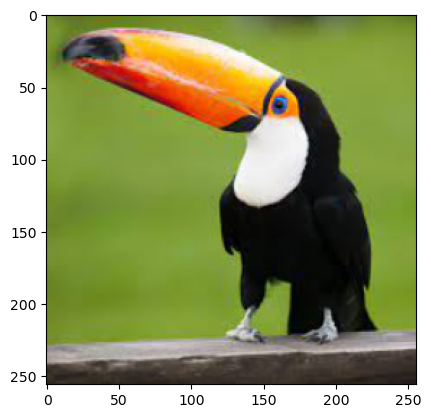

In [13]:
I = read_image('imgs/toucan.jpg')
show_image(I)
clf(I, k=5)

## Perform an attack

We now perform an adversarial attack on the image in order to obtain an example that is misclassified.

Iteration 1, loss: -6.7117767333984375
Iteration 2, loss: -6.822836875915527
Iteration 3, loss: -6.87140417098999
Iteration 4, loss: -6.88394832611084
Iteration 5, loss: -6.887211322784424
Iteration 6, loss: -6.892333984375
Iteration 7, loss: -6.902735233306885
Iteration 8, loss: -6.903742790222168
Iteration 9, loss: -6.905251979827881
Iteration 10, loss: -6.9007887840271
0: kite, probability: 2.522207237780094%
1: dial telephone, probability: 0.8531453087925911%
2: manhole cover, probability: 0.829712487757206%


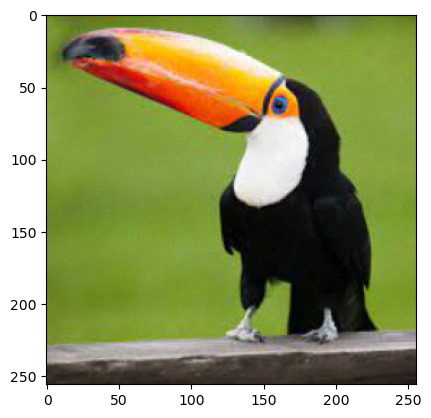

In [14]:
attack = adv.Linf_pgsd(attack_iters=10,
                      epsilon=0.01, 
                      alpha=0.007,
                      init_mode = 'zeros',
                      verbosity = 1)
xadv = attack(model, I)

show_image(xadv)
clf(xadv, k=3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


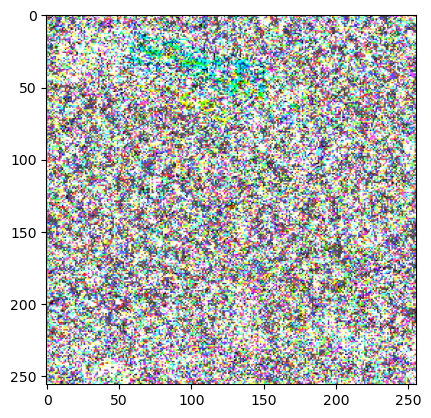

In [15]:
show_image((I-xadv).abs()*100)

# Targeted Attacks

We now perform a targeted attack in order to obtain a certain classification. We first need to select a class.

In [5]:
for j, c in enumerate(clf.categ):
    print(str(j) + ': ' + c)

0: tench
1: goldfish
2: great white shark
3: tiger shark
4: hammerhead
5: electric ray
6: stingray
7: cock
8: hen
9: ostrich
10: brambling
11: goldfinch
12: house finch
13: junco
14: indigo bunting
15: robin
16: bulbul
17: jay
18: magpie
19: chickadee
20: water ouzel
21: kite
22: bald eagle
23: vulture
24: great grey owl
25: European fire salamander
26: common newt
27: eft
28: spotted salamander
29: axolotl
30: bullfrog
31: tree frog
32: tailed frog
33: loggerhead
34: leatherback turtle
35: mud turtle
36: terrapin
37: box turtle
38: banded gecko
39: common iguana
40: American chameleon
41: whiptail
42: agama
43: frilled lizard
44: alligator lizard
45: Gila monster
46: green lizard
47: African chameleon
48: Komodo dragon
49: African crocodile
50: American alligator
51: triceratops
52: thunder snake
53: ringneck snake
54: hognose snake
55: green snake
56: king snake
57: garter snake
58: water snake
59: vine snake
60: night snake
61: boa constrictor
62: rock python
63: Indian cobra
64: gr

Iteration 1, loss: 6.908106327056885
Iteration 2, loss: 6.907711505889893
Iteration 3, loss: 6.907232761383057
Iteration 4, loss: 6.905879974365234
Iteration 5, loss: 6.896271705627441
Iteration 6, loss: 6.870980739593506
Iteration 7, loss: 6.635915756225586
Iteration 8, loss: 6.174670696258545
Iteration 9, loss: 6.051853179931641
Iteration 10, loss: 5.921570301055908
0: jellyfish, probability: 95.73774337768555%
1: goldfish, probability: 0.35278555005788803%
2: colobus, probability: 0.11131787905469537%


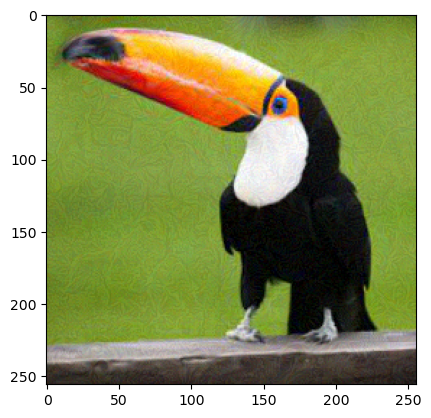

In [21]:
attack = adv.Linf_pgsd(targeted=True,
                      attack_iters=10, 
                      epsilon=0.04, 
                      alpha=0.01,
                      init_mode = 'uniform',
                      verbosity = 1)
xadv = attack(model, I, y=torch.tensor(([107])))

show_image(xadv)
clf(xadv, k=3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


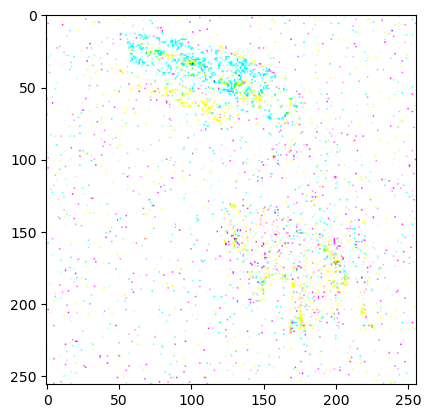

In [20]:
show_image((I-xadv).abs()*100)